# <font color = black> Information in the Digital Age: To Print, or Not to Print?</font>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_palette(palette = sns.cubehelix_palette(16, start=.5, rot=-.75))
import ipywidgets as widgets
from IPython.display import display
import matplotlib.patches as mpatches
%matplotlib inline

current_palette = (sns.cubehelix_palette(11, start = 0, rot = -.2, hue = .8))
color_palette_blue = sns.color_palette([[0.511349894059193, 0.6806709659595941, 0.7655890224567563],
                   [0.2764281884911032, 0.3731732867646266, 0.5243966585385236]])
color_palette_reds = (sns.cubehelix_palette(15, start = 0, rot = .4, gamma = .7, hue = .8))
color_palette_reds_short = sns.color_palette([[0.8779531840825798, 0.6723830245166298, 0.7305569619550163],
                    [0.38797959952069316, 0.2634205644548702, 0.4756315557339966]])
color_palette_rb = sns.color_palette([[0.5367965417091621, 0.34710704821283445, 0.5700737036563928],
                    [0.7734678479858961, 0.5272556215203946, 0.6740004726103662],
                    [0.9023985866483595, 0.7234867871960513, 0.7546015003960117],
                    [0.511349894059193, 0.6806709659595941, 0.7655890224567563],
                    [0.32863832963720324, 0.45269364455759714, 0.5971981465158609]])

> ## <font color = black> Dataset Overview and Introduction

This data set was recently conducted by the Pew Research Center (March 7th-April 4th of 2016) and shows the results of a _[survey](http://www.pewinternet.org/dataset/march-2016-libraries/)_ regarding Internet use, Library use and the reading habits of its respondents. 

The Research Center published multiple reports on the dataset, but two are mainly pertinent to the analysis in this notebook.  The first article entitled_[*Book Reading 2016*](http://www.pewinternet.org/2016/09/01/book-reading-2016/)_, notes that, despite the existence of numerous reading tablets and devices, print readership still remained dominant. The secong article, entitled _[*Information Overload*](http://www.pewinternet.org/2016/12/07/information-overload/)_, discusses the presence of "Information Overload" within various populations and looks at their demographics, internet access and web-use habits. Having studied medieval Italian literature in the past, I was curious about this preference for print and wanted to see how it interacted with the concept of "Information Overload." More specifically, since one of the questions on this survey inquired whether each respondent felt overwhelmend by the amount of information available on the Internet, or whether they enjoyed this, I wanted to look into how this correspondend with their choice of reading platforms.  One might assume, perhaps, that if someone felt overwhelmed by the internet or displeased with the amount of information they encountered on a daily basis, that this scenario might lead them to prefer a non-electronic form of reading (at least, this was one initial thought that came to mind on my part). The key word here, however, is "assume."  As such, I will start by examining the demographics of these readers (with the hopes of gaining some social-context as well as any additional insights this may lead to), thereafter moving on to investigate how the use of technology may or may not influence their decision making when choosing reading platforms. I will also look into how these might coorelate with Facebook and Twitter use.  While the Pew Research Center does a thorough analysis on the demographics of its respondents in the articles above, and materially speaking, covers some similar ground that we cover here, I intend to focus my data visualizations on those who read print materials versus other formats as well as on how these findings correspond to the sentiment of 'overload.'  After reading the two articles mentioned above, it seems as if there is room to investigate the intersection of print readers and 'information overload' within this dataset.

> #### Questions Driving Analysis:

1. What are the demographics of those who choose to read print books and those who choose otherwise?
2. Do these demographics point to any possible additional conclusions?
3. Are the people who choose print media also overwhelmed by the amount of information accessible via the internet and if so, what can possibly be deduced by such findings?
4. How often do these print consumers utilize the internet? Does this indicate an inversely proportional relationship or a directly proportional relationship between internet and print media use?
5. Does this relationship change at all when considering those who frequently use Facebook (or other social medias like Snapchat) and those who use it less frequently?  If so, how does this relate to what was found above?

In [2]:
data = pd.read_csv("April_4_2016_Libraries.csv")

all_data = pd.DataFrame(data)

> #### <div class="alert alert-block alert-info">Meta-Notes:
The original data file was in a CSV format, but some of the columns were either considered 'objects' or 'int64.'  I found it was easier to manipulte the data when it was an 'int64' type for Seaborn graphs, so I did some reformatting and then isolation of specific data groups below for the rest of the analysis.

In [3]:
g = all_data.intfreq.replace(' ', 0).astype(float).astype(int)
h = all_data.books2a.replace(' ', 0).astype(float).astype(int)
i = all_data.books2b.replace(' ', 0).astype(float).astype(int)
j = all_data.books2c.replace(' ', 0).astype(float).astype(int)
k = all_data.act128.replace(' ', 0).astype(float).astype(int)
l = all_data.act129.replace(' ', 0).astype(float).astype(int)
m = all_data.sns2a.replace(' ', 0).astype(float).astype(int)
n = all_data.sns2e.replace(' ', 0).astype(float).astype(int)
o = all_data.q8a.replace(' ', 0).astype(float).astype(int)
p = all_data.q8b.replace(' ', 0).astype(float).astype(int)
q = all_data.q8c.replace(' ', 0).astype(float).astype(int)
r = all_data.q8d.replace(' ', 0).astype(float).astype(int)
x = all_data.books1.replace(' ', 0).astype(float).astype(int)

frames = [g, h, i, j, k, l, m, n, o, p, q, r]

s = all_data.sex
t = all_data.q2a
u = all_data.q2c
v = all_data.q3
w = all_data.inc
y = all_data.q4

frames_2 = [s, t, u, v, w, y]

better_beta = pd.DataFrame(frames)
beta = pd.DataFrame(frames_2)

better_data = beta.append(better_beta)
better_data_x = better_data.transpose()

In [4]:
# Limiting types of readership
any_reader = better_data_x.where((better_data_x.books2a == 1) | (better_data_x.books2b == 1) | 
                                 (better_data_x.books2c == 1)).dropna().reset_index()
no_readers = better_data_x.where((better_data_x.books2a != 1) & (better_data_x.books2b != 1) & 
                                 (better_data_x.books2c != 1)).dropna().reset_index()
media_readers = better_data_x.where((better_data_x.books2a != 1) & (better_data_x.books2b == 1) |
                                (better_data_x.books2c == 1)).dropna().reset_index()

prints = better_data_x.where((better_data_x.books2a == 1)).dropna()
audiobooks = better_data_x.where(better_data_x.books2b == 1).dropna()
ebooks = better_data_x.where((better_data_x.books2c == 1)).dropna()

medias = [prints, audiobooks, ebooks]
media_type = pd.concat(medias)
media_beta = media_type[['sex', 'books2a', 'books2b', 'books2c']].dropna()

# Internet use divided by frequency
delta_1 = prints.where((prints.intfreq == 3) | (prints.intfreq == 2) | (prints.intfreq == 1)).dropna()
delta_3 = better_data_x.where((better_data_x.intfreq == 3) | (better_data_x.intfreq == 2) | 
                              (better_data_x.intfreq == 1)).dropna().reset_index()
delta_5 = better_data_x.where((better_data_x.intfreq == 4) | (better_data_x.intfreq == 5)).dropna().reset_index()
delta_x = better_data_x.where((better_data_x.intfreq == 3) | (better_data_x.intfreq == 2) | 
                              (better_data_x.intfreq == 1)|(better_data_x.intfreq == 4) | (better_data_x.intfreq == 5)).dropna()

# Overload and Internet Use:
delta_2 = delta_1.where((delta_1.q3 <= 2)).reset_index()
delta_4 = delta_3.where((delta_3.q3 <= 2)).reset_index()

# Sometimes feel stressed:
infostress1 = better_data_x.where(better_data_x.q2a == 1)

# Stress re institutional information:
infostress2 = better_data_x.where(better_data_x.q2c == 1)

# Definitely overloaded:
overload = better_data_x.where(better_data_x.q3 == 1)

# Like the info:
like_info = better_data_x.where(better_data_x.q3 == 2)
infostress_gen = better_data_x.where((better_data_x.q3 == 2) | (better_data_x.q3 == 1))
infostress_gen2 = better_data.iloc[3:4]

# App with message deleting:
snapchat = better_data_x.where(better_data_x.act128 == 1)
no_snapchat = better_data_x.where(better_data_x.act128 == 2)
all_snap = better_data_x.where((better_data_x.act128 == 1) | (better_data_x.act128 == 2))

# Anonymous App
anonapp = better_data_x.where(better_data_x.act129 == 1)
no_anonapp = better_data_x.where(better_data_x.act129 == 2)

# Frequent Twitter Users:
twitter = better_data_x.where((better_data_x.sns2a == 1) | (better_data_x.sns2a == 2) | (better_data_x.sns2a == 3))
no_twitter = better_data_x.where((better_data_x.sns2a == 5) | (better_data_x.sns2a == 6))
tr = better_data_x.where((better_data_x.sns2a == 1) | (better_data_x.sns2a == 2) | (better_data_x.sns2a == 3) | 
                         (better_data_x.sns2a == 5) | (better_data_x.sns2a == 6))

# Frequent Facebook Users:
facebook = better_data_x.where((better_data_x.sns2e == 1) | (better_data_x.sns2e == 2) | (better_data_x.sns2e == 3))
no_facebook = better_data_x.where((better_data_x.sns2e == 5) | (better_data_x.sns2e == 6))
fb = better_data_x.where((better_data_x.sns2e == 1) | (better_data_x.sns2e == 2) | 
                         (better_data_x.sns2e == 3) | (better_data_x.sns2e == 5) | 
                         (better_data_x.sns2e == 6) & (better_data_x.sns2e != 7) & 
                         (better_data_x.sns2e != 0))

# Reading Interests:
reader_interests = better_data_x[['q8a', 'q8b', 'q8c', 'q8d']]

# Information good or bad?:
infostatus = better_data_x.where((better_data_x.q4 == 1) | (better_data_x.q4 == 2) | (better_data_x.q4 == 3))

In [5]:
# Calculations for reference.
int_avg = delta_3.intfreq.count() / delta_x.intfreq.count()
fb_avg = facebook.sns2e.count() / fb.sns2e.count()
tr_avg = twitter.sns2a.count() / tr.sns2a.count()
snap_avg = snapchat.sns2a.count() / all_snap.sns2a.count()
snapv_int = snapchat.sns2a.count() / delta_3.intfreq.count()

> ## Demographic Analysis

> #### Breakdown by Gender:
First, I wanted to get an idea of how this preference for print was characterized by gender.  Here, you can see that the findings are pretty evenly spread.  There is a very slight majority of female readers who prefer paper-books.  The proportion remains quite similar when you look at the breakdown in the context of other platforms. Based on this data,  it doesn't seem as if gender has much of an influence on platform choice. When examining those who do not read in any platform, the divide is more noticeable, with males leading the majority and females taking the minority.

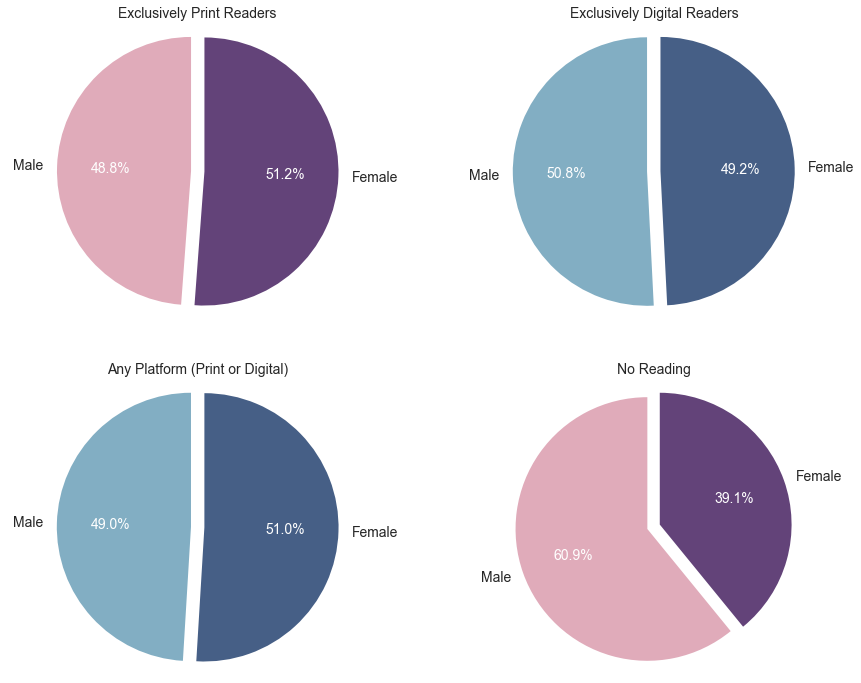

In [6]:
x = prints.groupby('sex').agg('count')
y = media_readers.groupby('sex').agg('count')
z = any_reader.groupby('sex').agg('count')
g = no_readers.groupby('sex').agg('count')

a = x.iloc[0:2, 0:1]
c = y.iloc[0:2, 0:1]
e = z.iloc[0:2, 0:1]
h = g.iloc[0:2, 0:1]

plt.figure(figsize = (15, 12))
explode = (0, 0.1)

plt.subplot(2, 2, 1)
patches, texts, autotexts = plt.pie(a, explode = explode, labels = ['Male', 'Female'], 
        colors = ['#e0abba', '#634379'], autopct = '%1.1f%%', startangle = 90)
plt.title('Exclusively Print Readers', {'fontsize':14})
plt.axis('equal')
for y in texts:
    y.set_size(14)
for x in autotexts:
    x.set_color('white')
    x.set_size(14)

plt.subplot(2, 2, 2)
patches, texts, autotexts = plt.pie(c, explode = explode, labels = ['Male', 'Female'], 
        colors = ['#82aec3', '#465f86'], autopct = '%1.1f%%', startangle = 90)
plt.title('Exclusively Digital Readers', {'fontsize':14})
plt.axis('equal')
for y in texts:
    y.set_size(14)
for x in autotexts:
    x.set_color('white')
    x.set_size(14)

plt.subplot(2, 2, 3)
patches, texts, autotexts = plt.pie(e, explode = explode, labels = ['Male', 'Female'], 
        colors = ['#82aec3', '#465f86'], autopct = '%1.1f%%', startangle = 90)
plt.title('Any Platform (Print or Digital)', {'fontsize':14})
plt.axis('equal')
for y in texts:
    y.set_size(14)
for x in autotexts:
    x.set_color('white')
    x.set_size(14)
    
plt.subplot(2, 2, 4)
patches, texts, autotexts = plt.pie(h, explode = explode, labels = ['Male', 'Female'], 
        colors = ['#e0abba', '#634379'], autopct = '%1.1f%%', startangle = 90)
plt.title('No Reading', {'fontsize':14})
plt.axis('equal')
for y in texts:
    y.set_size(14)
for x in autotexts:
    x.set_color('white')
    x.set_size(14)

plt.show()

> #### Breakdown By Income
Here, I thought it would be interesting to compare the income levels of those who read books in different formats.  These graphs don't show too much variation, aside from the fact that electronic platforms (Audiobooks and Ebooks) have a greater dispartity in income when compared to those who read print books (something that was also noted in the article mentioned above (_[*Information Overload*](http://www.pewinternet.org/2016/12/07/information-overload/)_). Essentially, those with more financial means are able to access e-readers and digital platforms when compared to those with less financial means. Visually, the income of print readers seems slightly more evenly dispersed when compared to the others on the right, where more respondents fall under a higher income bracket. Again, there could be some overlap here between print and digital readers, so this is not conclusive, but there is a slight difference in the income of the respondents here.

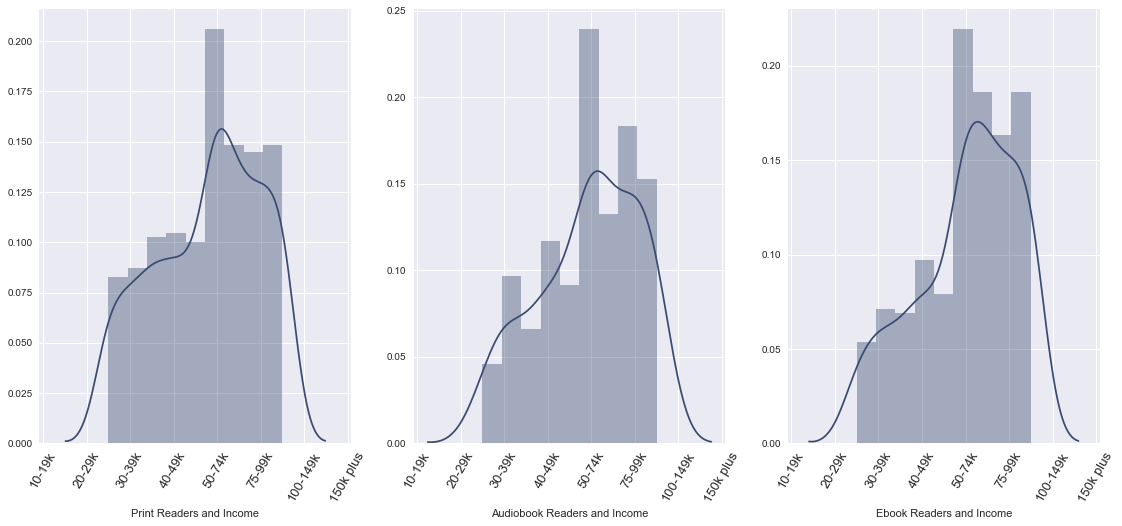

In [7]:
a = prints.where((prints.inc != 99) & (prints.inc != 98)).dropna()
c = audiobooks.where((audiobooks.inc != 99) & (audiobooks.inc != 98)).dropna()
e = ebooks.where((ebooks.inc != 99) & (ebooks.inc != 98)).dropna()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (19, 8), sharex = True, sharey = False)

sns.distplot(a = a.inc, ax = ax1, bins = 9, color = '#3a4b71', axlabel = "Print Readers and Income")
ax1.set_xticklabels(['< 10k', '10-19k', '20-29k', '30-39k', '40-49k', '50-74k', 
                     '75-99k', '100-149k', '150k plus'], rotation = 60, size = 13)

sns.distplot(a = c.inc, ax = ax2, bins = 9, color = '#3a4b71', axlabel = "Audiobook Readers and Income")
ax2.set_xticklabels(['< 10k', '10-19k', '20-29k', '30-39k', '40-49k', '50-74k', 
                     '75-99k', '100-149k', '150k plus'], rotation = 60, size = 13)

sns.distplot(a = e.inc, ax = ax3, bins = 9, color = '#3a4b71', axlabel = "Ebook Readers and Income")
ax3.set_xticklabels(['< 10k', '10-19k', '20-29k', '30-39k', '40-49k', '50-74k',
                     '75-99k', '100-149k', '150k plus'], rotation = 60, size = 13)
plt.show()

> ## Overall Internet Usage

Here, I wanted to examine the general trends regarding internet usage before diving into perspectives regarding information overload.  Let's start with a look at internet usage at large among the respondents as well as their interactions with Facebook, Twitter and Snapchat.

>#### Internet and Facebook/Twitter Usage:

The graphs below describe the amount of respondents using the specified media.  Not surprisingly, a majority of the respondents access the internet at least once a day. It is important to mention that these graphs are based on the number of respondents who answered definitively whether they used the specific media or not; they do not include uncertain answers or those who preferred not to respond. Nonetheless, the vast majority of respondents use the internet frequently (on average, 87.4% of respondents use the internet at least once a day).
The second graph describes the amount of Facebook use among those who answered the prompt conclusively. This shows a usage rate of 90.4% of respondents using Facebook at least a few times each week. 
Percentages change as we reach the second row of graphs where Twitter and Snapchat are addressed. Twitter use is relatively even amongst the respondents while most of those answering conclusively about Snapchat said they do *not* use Snapchat.  This is an interesting outcome given the prevalence of social media and the high use of internet we see within this data-set.  In fact, only 11.9% of those using the internet at least once a day also utilize Snapchat. 

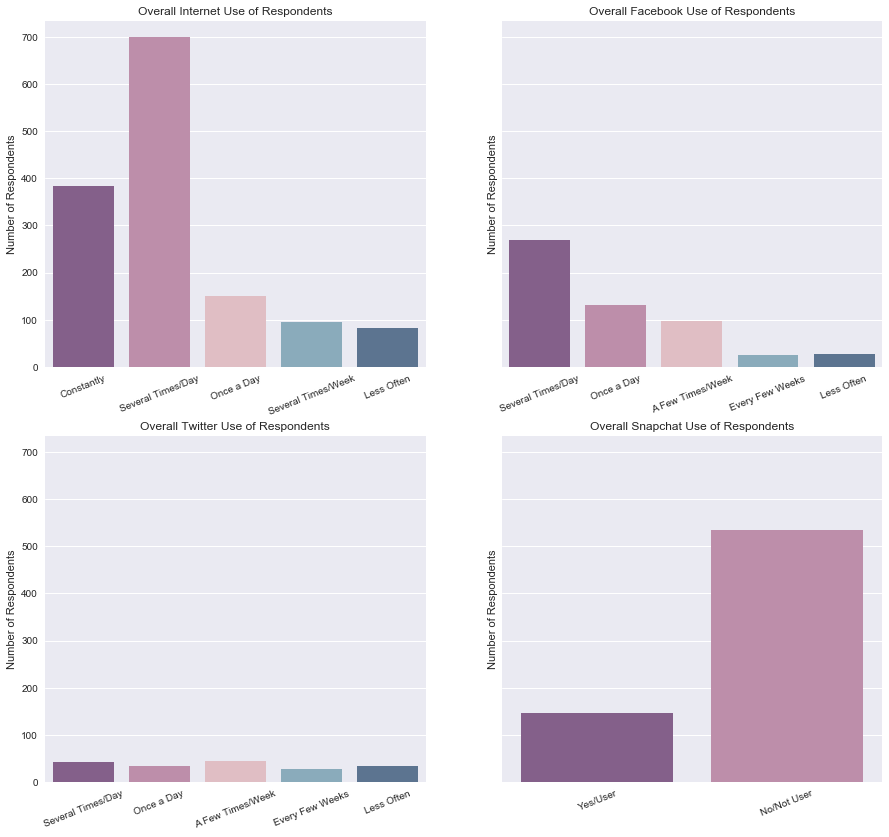

In [8]:
all_snapchat = better_data_x.where((better_data_x.act128 >= 1)&(better_data_x.act128 <= 2)).dropna()

f, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize = (15, 14), sharex = False, sharey = True)

sns.countplot(x = 'intfreq', data = delta_x, palette = color_palette_rb, ax = ax1)
ax1.set(title='Overall Internet Use of Respondents', ylabel = "Number of Respondents", xlabel = '')
ax1.set_xticklabels(['Constantly', 'Several Times/Day', 'Once a Day', 
                     'Several Times/Week', 'Less Often'], rotation = 22)

sns.countplot(x = 'sns2e', data = fb, palette = color_palette_rb, ax = ax2)
ax2.set(title='Overall Facebook Use of Respondents', ylabel = "Number of Respondents", xlabel = '')
ax2.set_xticklabels(['Several Times/Day', 'Once a Day', 'A Few Times/Week', 
                     'Every Few Weeks', 'Less Often'], rotation = 22)

sns.countplot(x = 'sns2a', data = tr, palette = color_palette_rb, ax = ax3)
ax3.set(title='Overall Twitter Use of Respondents', ylabel = "Number of Respondents", xlabel = '')
ax3.set_xticklabels(['Several Times/Day', 'Once a Day', 'A Few Times/Week', 
                     'Every Few Weeks', 'Less Often'], rotation = 22)

sns.countplot(x = 'act128', data = all_snapchat, palette = color_palette_rb, ax = ax4)
ax4.set(title='Overall Snapchat Use of Respondents', ylabel = "Number of Respondents", xlabel = '')
ax4.set_xticklabels(['Yes/User', 'No/Not User'], rotation = 22)

plt.show()

> ## Internet and Readership Habits


Here, I wanted to see the distribution of multiple variables at once:

 - Who was choosing to read physical books in comparison to the sum of the respondents at large,
 - How many of these two groups were using the internet frequently and how frequently were they using it.
 - How many of each group either felt overwhelmed by all of the information they encounter on a daily basis or felt that they liked this growing amount of information.
 
Given that the Pew Center's article mentioned a pervasive selection of print books amongst the growing number of e-reading options, I wanted to see if there was any correlation between people choosing print books *because* they felt overloaded/stressed by all of this information.  While the article mentioned above ("Information Overload") discusses the prevalence of 'Information Overload' among those who use, or do not use, the internet frequently, they do not discuss how it may or may not effect a choice of reading print media or not.  The following discussion attempts to address this situation.

First, I examine which respondents read the most print media: those who use the internet, or Facebook, etc more or those who use them less?  Interestingly enough, of this subset of respondents, those who use print materials the most tend to use the internet and digital media the most.  Some users of digital media who choose *not* to read print materials do outnumber those who read print materials (see the plot describing Twitter users who fall under the middle category of using the social platform a few times each week).  That said, the highest number of people choosing print media for each platform is found among those using digital media at least a few times per week, if not more.  

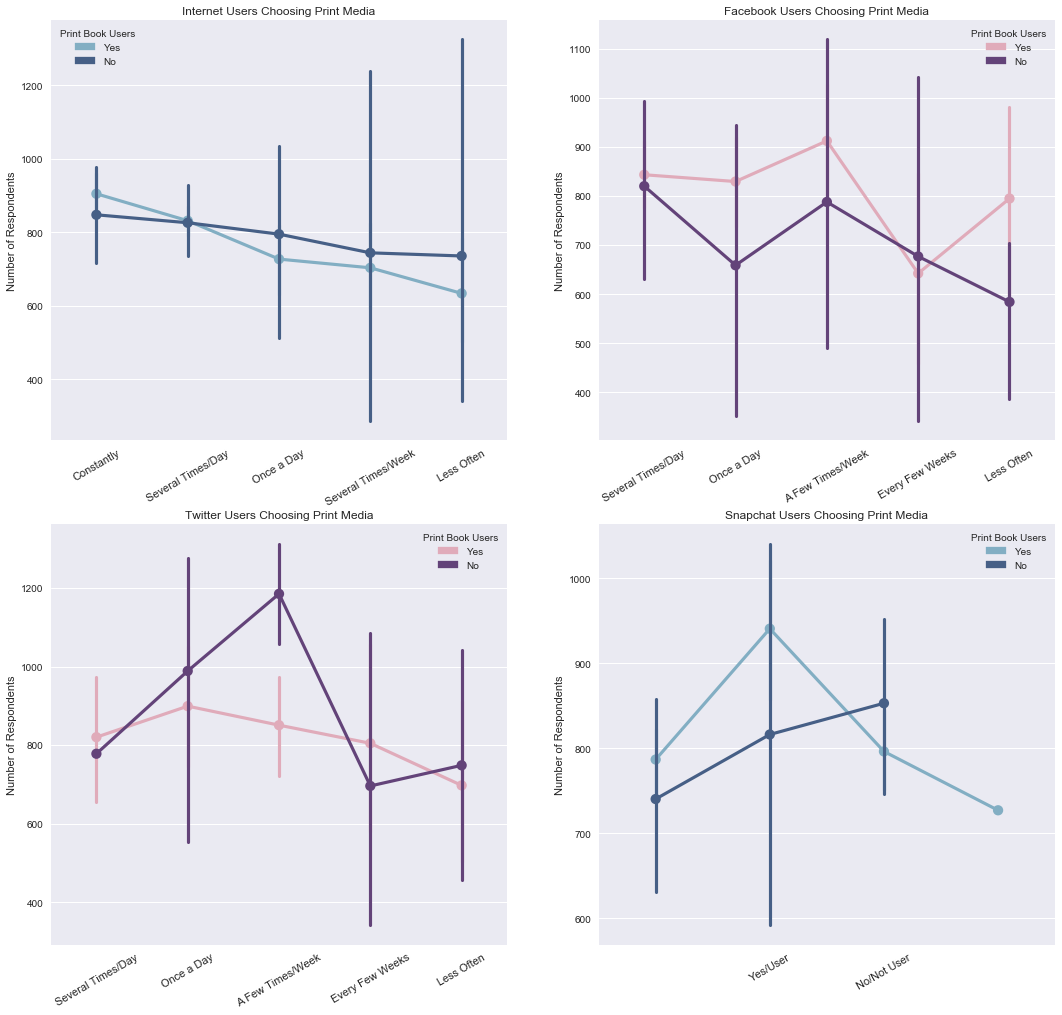

In [9]:
x = delta_x.where((delta_x.books2a == 1)|(delta_x.books2a == 2)).dropna().reset_index()
b = fb.where((fb.books2a == 1)|(fb.books2a == 2)).dropna().reset_index()
z = tr.where((tr.books2a == 1)|(tr.books2a == 2)).reset_index()
p = better_data_x.where((better_data_x.books2a == 1)|(better_data_x.books2a == 2)).reset_index()

f, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(18, 17))

sns.pointplot(x = 'intfreq', y = 'index', hue = 'books2a', data = x, ax = ax1, palette=color_palette_blue)
ax1.set(title = 'Internet Users Choosing Print Media', xlabel = '', ylabel = "Number of Respondents")
ax1.set_xticklabels(['Constantly', 'Several Times/Day', 'Once a Day', 
                     'Several Times/Week', 'Less Often'], rotation = 30, size = 11)
lblue_patch = mpatches.Patch(color = '#82aec3', label = 'Yes')
dblue_patch = mpatches.Patch(color = '#465f86', label = 'No')
ax1.legend(loc=0, title = ("Print Book Users"), handles = [lblue_patch, dblue_patch])

sns.pointplot(x = 'sns2e', y = 'index', hue = 'books2a', data = b, ax = ax2, palette=color_palette_reds_short)
ax2.set(title = 'Facebook Users Choosing Print Media', xlabel = '', ylabel = "Number of Respondents")
ax2.set_xticklabels(['Several Times/Day', 'Once a Day', 'A Few Times/Week', 
                     'Every Few Weeks', 'Less Often'], rotation = 30, size = 11)
lred_patch = mpatches.Patch(color = '#e0abba', label = 'Yes')
dred_patch = mpatches.Patch(color = '#634379', label = 'No')
ax2.legend(loc=0, title = ("Print Book Users"), handles = [lred_patch, dred_patch])

sns.pointplot(x = 'sns2a', y = 'index', hue = 'books2a', data = z, ax = ax3, palette=color_palette_reds_short)
ax3.set(title = 'Twitter Users Choosing Print Media', xlabel = '', ylabel = "Number of Respondents")
ax3.set_xticklabels(['Several Times/Day', 'Once a Day', 'A Few Times/Week', 
                     'Every Few Weeks', 'Less Often'], rotation = 30, size = 11)
lred_patch = mpatches.Patch(color = '#e0abba', label = 'Yes')
dred_patch = mpatches.Patch(color = '#634379', label = 'No')
ax3.legend(loc=0, title = ("Print Book Users"), handles = [lred_patch, dred_patch])

sns.pointplot(x = 'act128', y = 'index', hue = 'books2a', data = p, ax = ax4, palette=color_palette_blue)
ax4.set(title = 'Snapchat Users Choosing Print Media', xlabel = '', ylabel = "Number of Respondents")
ax4.set_xticklabels(['', 'Yes/User', 'No/Not User'], rotation = 30, size = 11)
lblue_patch = mpatches.Patch(color = '#82aec3', label = 'Yes')
dblue_patch = mpatches.Patch(color = '#465f86', label = 'No')
ax4.legend(loc=0, title = ("Print Book Users"), handles = [lblue_patch, dblue_patch])

plt.show()

The cell below performs a T-Test between frequent and non-frequent internet users and their choice of reading print materials or not. After running the cell below a few times, you can see that the P-Value more often than not falls below 5%.  This demonstrates that the difference between each sample population is significant enough that it would probably not occur by chance, but instead represents a legitimate variance within the populations.

In [10]:
# T-Test comparing the choice of print materials between freqent and non-frequent internet users.
a = delta_3.where(delta_3.books2a == 1).dropna().reset_index()
b = delta_3.where(delta_3.books2a == 2).dropna().reset_index()
c = delta_5.where(delta_5.books2a == 1).dropna().reset_index()
d = delta_5.where(delta_5.books2a == 2).dropna().reset_index()

x = delta_3.books2a
y = delta_5.books2a

sam1 = np.random.choice(x, 150, replace = True)
sam2 = np.random.choice(y, 150, replace = True)

stats.ttest_ind(sam1, sam2, equal_var = False)

Ttest_indResult(statistic=2.1973094295379658, pvalue=0.028997714204600421)

The following graphs are somewhwat similar the the graphs above, but also look at the other types of media used by both frequent and infrequent users of the internet.  Instead of seeing the use of print media fall while the use of internet (or digital platforms, for that matter), we see the opposite.  As the use of internet increases, so does the incidence of choosing any type of reading platform, be it print or digital. While the article mentioned above on "Information Overload" discusses how feelings of information overload tend to occur more in those who have less internet access and less digital devices, it does not consider this sentiment in terms of overall literacy (both print and digital).  Section 3 of the article touches on this and describes 'digital literacy' (without using this precise term) as being one possible explanation for this correspondence between information overload and lack of internet access, but does not consider its implications for literacy in a broader sense.  And while it does point to education as one factor, it is also important to consider functional literacy (both digital and traditional) outside of a person's education and how it enables them to perform personally and professionally (outside of an educational context). The following graphs attempt to investigate and support this line of thought.

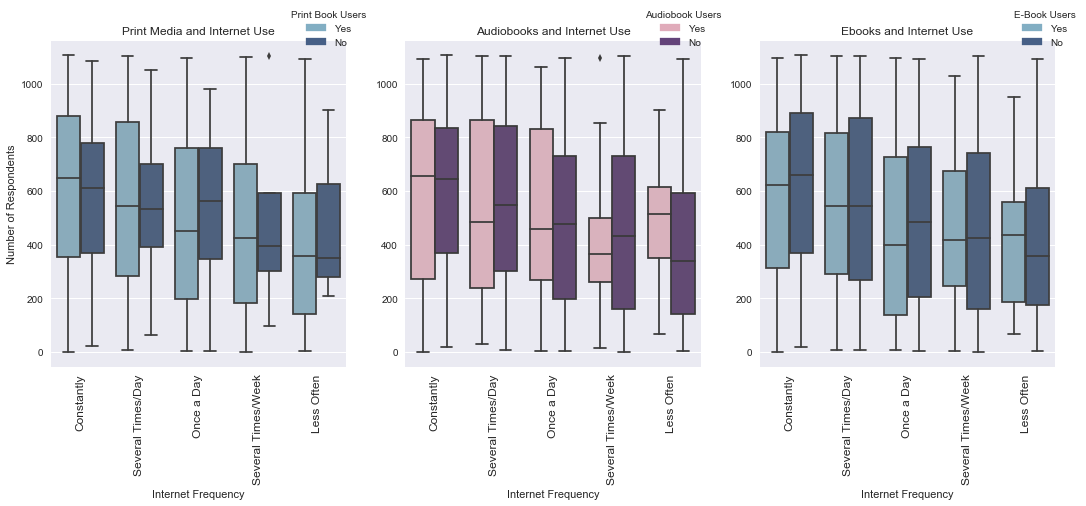

In [11]:
do = delta_x.where((delta_x.books2a == 1)|(delta_x.books2a == 2)).dropna().reset_index()
re = delta_x.where((delta_x.books2b == 1)|(delta_x.books2b == 2)).dropna().reset_index()
mi = delta_x.where((delta_x.books2c == 1)|(delta_x.books2c == 2)).dropna().reset_index()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 6), sharex = False, sharey = False)

sns.boxplot(x = 'intfreq', y = do.index, hue = 'books2a', 
                  data = do, palette = color_palette_blue, ax = ax1)
lblue_patch = mpatches.Patch(color = '#82aec3', label = 'Yes')
dblue_patch = mpatches.Patch(color = '#465f86', label = 'No')
ax1.legend(loc='upper right', bbox_to_anchor=(1.10, 1.12), title = ("Print Book Users"),
                   handles = [lblue_patch, dblue_patch])
ax1.set_xticklabels(['Constantly', 'Several Times/Day', 'Once a Day', 
                   'Several Times/Week', 'Less Often'], rotation = 90, size = 12)
ax1.set(ylabel = "Number of Respondents", xlabel = "Internet Frequency", title = "Print Media and Internet Use")

sns.boxplot(x = 'intfreq', y = re.index, hue = 'books2b', 
                  data = re, palette = color_palette_reds_short, ax = ax2)
lred_patch = mpatches.Patch(color = '#e0abba', label = 'Yes')
dred_patch = mpatches.Patch(color = '#634379', label = 'No')
ax2.legend(loc='upper right', bbox_to_anchor=(1.10, 1.12), title = ("Audiobook Users"), 
                handles = [lred_patch, dred_patch])
ax2.set_xticklabels(['Constantly', 'Several Times/Day', 'Once a Day', 
                   'Several Times/Week', 'Less Often'], rotation = 90, size = 12)
ax2.set(xlabel = "Internet Frequency", title = "Audiobooks and Internet Use")

sns.boxplot(x = 'intfreq', y = mi.index, hue = 'books2c', 
                  data = mi, palette = color_palette_blue, ax = ax3)
lblue_patch = mpatches.Patch(color = '#82aec3', label = 'Yes')
dblue_patch = mpatches.Patch(color = '#465f86', label = 'No')
ax3.legend(loc='upper right', bbox_to_anchor=(1.10, 1.12), title = ("E-Book Users"), 
                   handles = [lblue_patch, dblue_patch])
ax3.set_xticklabels(['Constantly', 'Several Times/Day', 'Once a Day', 
                   'Several Times/Week', 'Less Often'], rotation = 90, size = 12)
ax3.set(xlabel = "Internet Frequency", title = "Ebooks and Internet Use")

plt.show()

The next graphs look at the same platform differences among respondents who utilize Facbook at varying frequencies.  Again, we see that the choice for print material still remains relatively popular even if people use Facebook on a regular basis. What is more, when considering the graph on the far left, we see that those who use Facebook lest often also read E-books significantly less.  In this instance, infrequent use corresponds with infrequent E-book reading. This is a potentially corroborating element to any theory which looks at internet access and digital literacy.

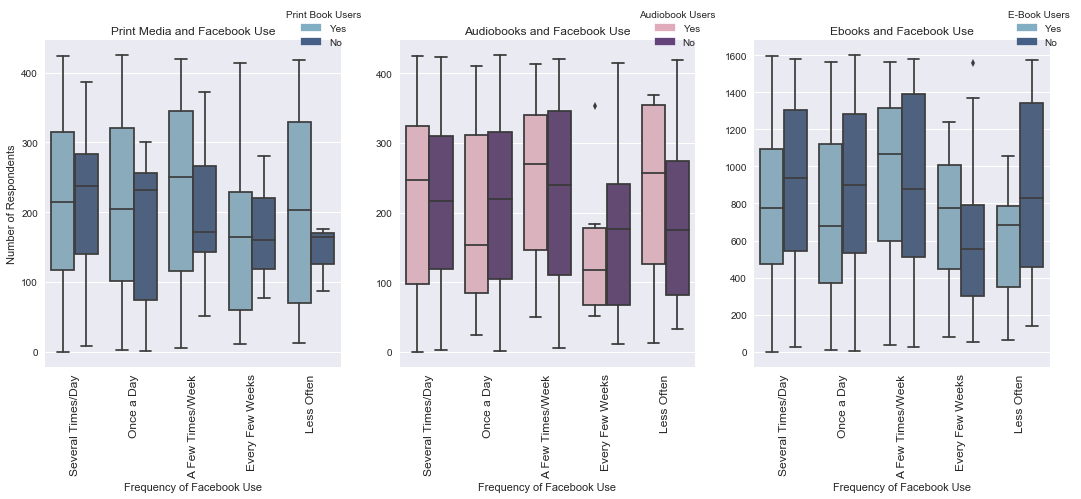

In [12]:
fb.where((fb.sns2e != 8) & (fb.sns2e != 9) & (fb.sns2e != 0)).dropna().reset_index()
fb2 = fb[['sns2e', 'books2a', 'books2b', 'books2c']]

gamma = fb2.where((fb2.books2a == 1)|(fb2.books2a == 2)).dropna().reset_index()
mu = fb2.where((fb2.books2b == 1)|(fb2.books2b == 2)).dropna().reset_index()
nu = fb2.where((fb2.books2c == 1)|(fb2.books2c == 2)).reset_index()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 6), sharex = False, sharey = False)

sns.boxplot(x = 'sns2e', y = gamma.index, hue = 'books2a', data = gamma, palette = color_palette_blue, ax = ax1)
lblue_patch = mpatches.Patch(color = '#82aec3', label = 'Yes')
dblue_patch = mpatches.Patch(color = '#465f86', label = 'No')
ax1.legend(loc='upper right', bbox_to_anchor=(1.10, 1.12), title = ("Print Book Users"),
                   handles = [lblue_patch, dblue_patch])
ax1.set_xticklabels(['Several Times/Day', 'Once a Day', 'A Few Times/Week', 
                     'Every Few Weeks', 'Less Often'], rotation = 90, size = 12)
ax1.set(ylabel = "Number of Respondents", xlabel = "Frequency of Facebook Use", title = "Print Media and Facebook Use")

sns.boxplot(x = 'sns2e', y = mu.index, hue = 'books2b', data = mu, palette = color_palette_reds_short, ax = ax2)
lred_patch = mpatches.Patch(color = '#e0abba', label = 'Yes')
dred_patch = mpatches.Patch(color = '#634379', label = 'No')
ax2.legend(loc='upper right', bbox_to_anchor=(1.10, 1.12), title = ("Audiobook Users"), 
                handles = [lred_patch, dred_patch])
ax2.set_xticklabels(['Several Times/Day', 'Once a Day', 'A Few Times/Week', 
                     'Every Few Weeks', 'Less Often'], rotation = 90, size = 12)
ax2.set(xlabel = "Frequency of Facebook Use", title = "Audiobooks and Facebook Use")

sns.boxplot(x = 'sns2e', y = nu.index, hue = 'books2c', data = nu, palette = color_palette_blue, ax = ax3)
lblue_patch = mpatches.Patch(color = '#82aec3', label = 'Yes')
dblue_patch = mpatches.Patch(color = '#465f86', label = 'No')
ax3.legend(loc='upper right', bbox_to_anchor=(1.10, 1.12), title = ("E-Book Users"), 
                   handles = [lblue_patch, dblue_patch])
ax3.set_xticklabels(['Several Times/Day', 'Once a Day', 'A Few Times/Week', 
                     'Every Few Weeks', 'Less Often'], rotation = 90, size = 12)
ax3.set(xlabel = "Frequency of Facebook Use", title = "Ebooks and Facebook Use")

plt.show()

> ## Internet Usage and Feelings Regarding Information Overload

This section aims to describe information overload and how it corresponds with internet use at large, so as to investigate how they interact with choices of reading platforms.  In order to dive into some more complicated associations between these elements, it will be helpful to consider internet use and information overload in general terms, and build on them thereafter.

The next set of graphs is relatively basic and aims to show how the respondents at large answered questions regarding information overload and preferences regarding information.  As you can see, most of the respondents are comfortable with a fair amount of information and consider it beneficial to their daily lives.

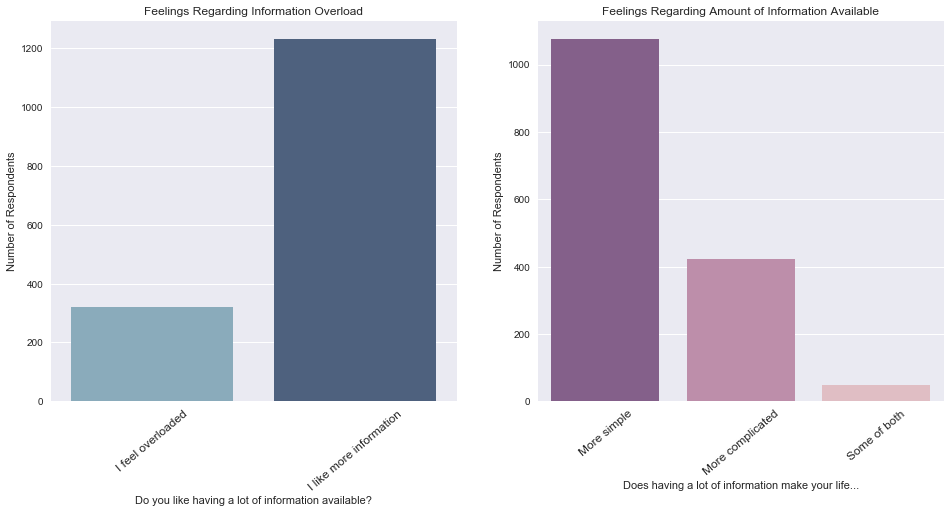

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 7))

sns.countplot(infostress_gen.q3, palette = color_palette_blue, ax = ax1)
ax1.set_xticklabels(['I feel overloaded', 'I like more information'], rotation = 40, size = 12)
ax1.set(title = "Feelings Regarding Information Overload", 
        xlabel = "Do you like having a lot of information available?",
        ylabel = "Number of Respondents")

sns.countplot(infostatus.q4, palette = color_palette_rb, ax = ax2)
ax2.set_xticklabels(['More simple', 'More complicated', 'Some of both'], rotation = 40, size = 12)
ax2.set(title = "Feelings Regarding Amount of Information Available", 
        xlabel = "Does having a lot of information make your life...",
        ylabel = "Number of Respondents")

plt.show()

The graphs here display the instances of information overload in correlation with internet and social media usage.  As you can see, this corroborates the Pew's Research Center's summary that information overload is inversely proportional to internet and social media use.  The only exception, interestingly enough, is Snapchat, where we see a higher level of comfort with information in those who use Snapchat less.  The implications of this specific instance are somewhat interesting and could lead to further avenues of pertinent research. 

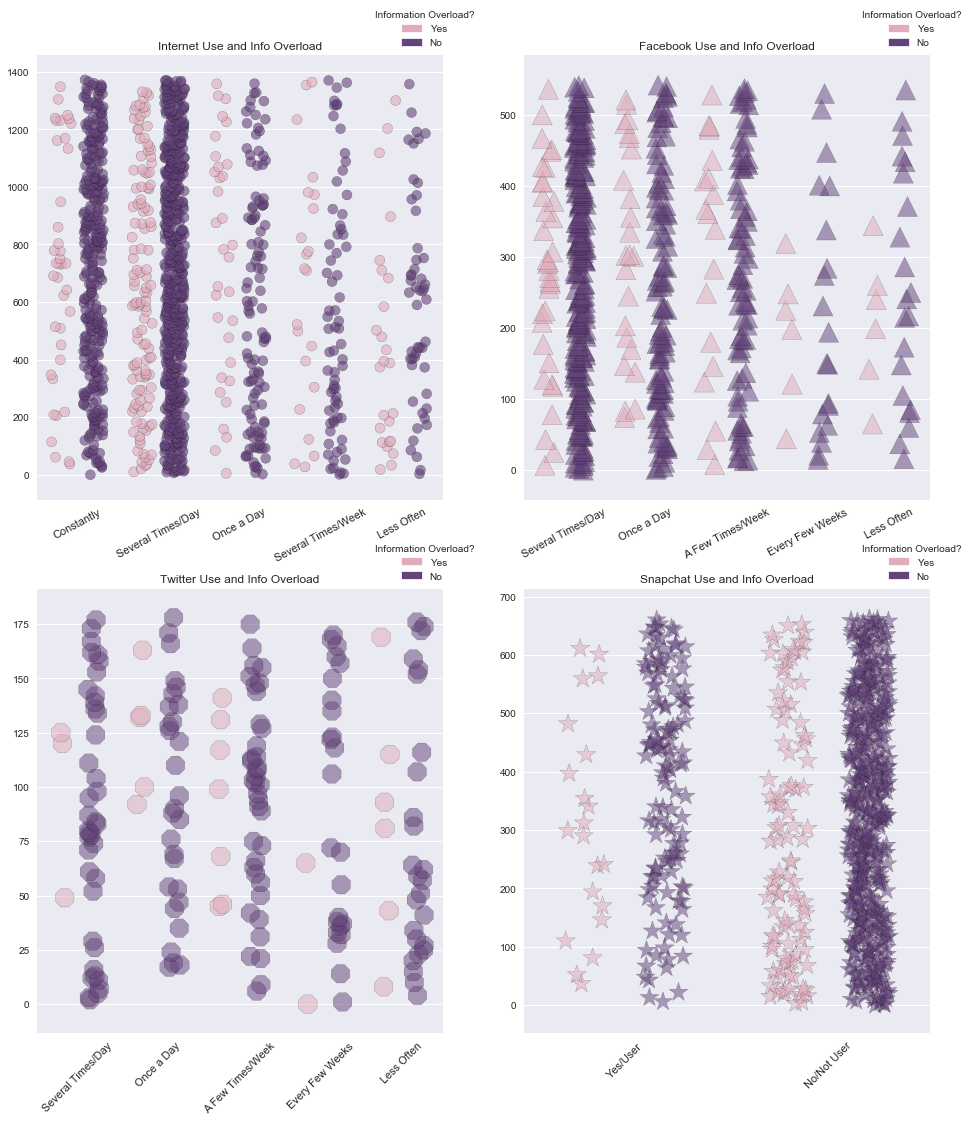

In [14]:
omicron = delta_x.where((delta_x.q3 == 1) | (delta_x.q3 == 2)).dropna().reset_index()
epsilon = fb.where((fb.q3 == 1) | (fb.q3 == 2)).dropna().reset_index()
zeta = tr.where((tr.q3 == 1) | (tr.q3 == 2)).dropna().reset_index()
theta = all_snap.where((all_snap.q3 == 1) | (all_snap.q3 == 2)).dropna().reset_index()

f, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize = (16, 18))
sns.stripplot(x = 'intfreq', y = omicron.index, data = omicron, hue = "q3",
              palette = color_palette_reds_short, size = 20, marker = '.', edgecolor = 'black',
              linewidth = .25, alpha = .6, jitter = .25, split = True, ax = ax1)
lred_patch = mpatches.Patch(color = '#e0abba', label = 'Yes')
dred_patch = mpatches.Patch(color = '#634379', label = 'No')
ax1.legend(loc='upper right', bbox_to_anchor=(1.10, 1.12), title = 'Information Overload?', handles = [lred_patch, dred_patch])
ax1.set_xticklabels(['Constantly', 'Several Times/Day', 'Once a Day', 'Several Times/Week', 'Less Often'], rotation = 28, size = 11)
ax1.set(xlabel = "", title = "Internet Use and Info Overload")

sns.stripplot(x = 'sns2e', y = epsilon.index, data = epsilon, hue = "q3",
              palette = color_palette_reds_short, size = 20, marker = '^', edgecolor = 'black',
              linewidth = .25, alpha = .5, jitter = .15, split = True, ax = ax2)
lblue_patch = mpatches.Patch(color = '#e0abba', label = 'Yes')
dblue_patch = mpatches.Patch(color = '#634379', label = 'No')
ax2.legend(loc='upper right', bbox_to_anchor=(1.10, 1.12), title = 'Information Overload?', handles = [lblue_patch, dblue_patch])
ax2.set_xticklabels(['Several Times/Day', 'Once a Day', 'A Few Times/Week', 
                     'Every Few Weeks', 'Less Often'], rotation = 28, size = 11)
ax2.set(xlabel = "", title = "Facebook Use and Info Overload")                     

sns.stripplot(x = 'sns2a', y = zeta.index, data = zeta, hue = "q3",
              palette = color_palette_reds_short, size = 20, marker = '8', edgecolor = 'black',
              linewidth = .25, alpha = .5, jitter = .15, split = True, ax = ax3)
ax3.set_xticklabels(['Several Times/Day', 'Once a Day', 'A Few Times/Week', 
                     'Every Few Weeks', 'Less Often'], rotation = 45, size = 11)
lred_patch = mpatches.Patch(color = '#e0abba', label = 'Yes')
dred_patch = mpatches.Patch(color = '#634379', label = 'No')
ax3.legend(loc='upper right', bbox_to_anchor=(1.10, 1.12), title = ('Information Overload?'), handles = [lred_patch, dred_patch])
ax3.set(xlabel = "", title = "Twitter Use and Info Overload")   
                    
sns.stripplot(x = 'act128', y = theta.index, data = theta, hue = "q3",
              palette = color_palette_reds_short, size = 20, marker = '*', edgecolor = 'black',
              linewidth = .25, alpha = .5, jitter = .2, split = True, ax = ax4)
ax4.set_xticklabels(['Yes/User', 'No/Not User'], rotation = 45, size = 11)
lblue_patch = mpatches.Patch(color = '#e0abba', label = 'Yes')
dblue_patch = mpatches.Patch(color = '#634379', label = 'No')
ax4.legend(loc='upper right', bbox_to_anchor=(1.10, 1.12), title = ("Information Overload?"), handles = [lblue_patch, dblue_patch])
ax4.set(xlabel = "", title = "Snapchat Use and Info Overload")                 
plt.show() 

The following graphs demonstrate not only that information overload decreases with frequency of internet use, but also that print readership remains consistently high and only lowers with a decreased use of internet and information overload. 

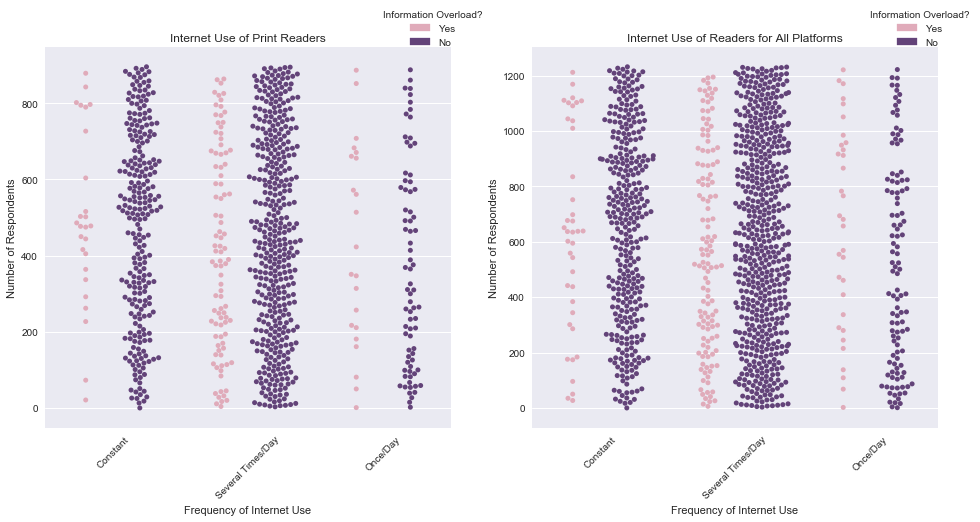

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 7), sharex = True, sharey = False)

sns.swarmplot(x = 'intfreq', y = delta_2.index, hue = 'q3', data = delta_2,
            split = True, palette = color_palette_reds_short, ax = ax1).set_xticklabels(
            ['Constant','Several Times/Day', 'Once/Day'], rotation = 45)
ax1.set(title = "Internet Use of Print Readers", ylabel = "Number of Respondents", 
           xlabel = "Frequency of Internet Use")
lred_patch = mpatches.Patch(color = '#e0abba', label = 'Yes')
dred_patch = mpatches.Patch(color = '#634379', label = 'No')
ax1.legend(loc='upper right', bbox_to_anchor=(1.10, 1.12), title = ("Information Overload?"),
            handles = [lred_patch, dred_patch])

sns.swarmplot(x = 'intfreq', y = delta_4.index, hue = 'q3', data = delta_4,
            split = True, palette = color_palette_reds_short, ax = ax2).set_xticklabels(
            ['Constant','Several Times/Day', 'Once/Day'], rotation = 45)
ax2.set(title = "Internet Use of Readers for All Platforms", ylabel = "Number of Respondents", 
           xlabel = "Frequency of Internet Use")
lred_patch = mpatches.Patch(color = '#e0abba', label = 'Yes')
dred_patch = mpatches.Patch(color = '#634379', label = 'No')
ax2.legend(loc='upper right', bbox_to_anchor=(1.10, 1.12), title = ("Information Overload?"),
            handles = [lred_patch, dred_patch])

plt.show()

These three graphs were generated to see how the respondents choose their reading formats in relation to their sense of information overload. Again, we see that a higher level of comfort with information leads to a higher probability of choosing print books.  In fact, among these respondents - print books seem to be the most popular when compared to audiobooks and e-books.

In the first graph, we observe respondents who were either overwhelmed or pleased with the amount of information available.  While a stark majority of those who were overwhelmed did choose print books, those who were comfortable with the amount of information available to them were *far* more likely to choose print media.

Moving on the the middle graph, those in group 2 (i.e. those who like information) demonstrated an avoidance of audiobooks, which was relatively similar to the trend for those in group 1 (i.e. those who feel overloaded).

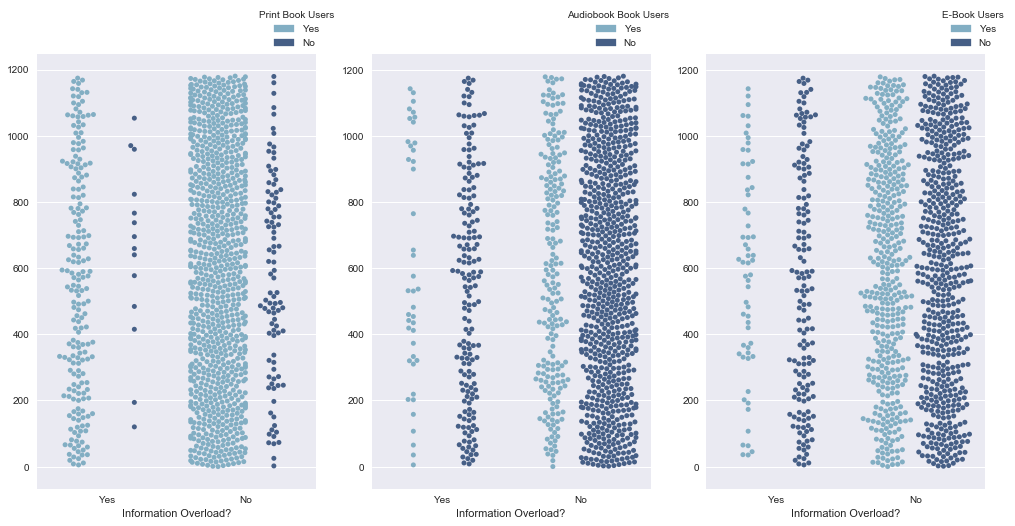

In [16]:
phi = infostress_gen.where((infostress_gen.q3 == 1)|(infostress_gen.q3 == 2))
rho = phi[(phi.books2a == 1) | (phi.books2a == 2)].reset_index()
psi = phi[(phi.books2b == 1) | (phi.books2b == 2)].reset_index()
pi = phi[(phi.books2c == 1) | (phi.books2c == 2)].reset_index()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (17, 8), sharex = True, sharey = False)

sns.swarmplot(x = 'q3', y = rho.index, hue = 'books2a', data = rho, 
              split = True, palette = color_palette_blue,
              ax = ax1)
lblue_patch = mpatches.Patch(color = '#82aec3', label = 'Yes')
dblue_patch = mpatches.Patch(color = '#465f86', label = 'No')
ax1.legend(loc='upper right', bbox_to_anchor=(1.10, 1.12), title = ("Print Book Users"),
                   handles = [lblue_patch, dblue_patch])
ax1.set(xlabel = "Information Overload?")
ax1.set_xticklabels(["Yes", "No"])

sns.swarmplot(x = 'q3', y = psi.index, hue = 'books2b', data = psi, 
              split = True, palette = color_palette_blue,
              ax = ax2) 
lblue_patch = mpatches.Patch(color = '#82aec3', label = 'Yes')
dblue_patch = mpatches.Patch(color = '#465f86', label = 'No')
ax2.legend(loc='upper right', bbox_to_anchor=(1.10, 1.12), title = ("Audiobook Book Users"),
                   handles = [lblue_patch, dblue_patch])
ax2.set(xlabel = "Information Overload?")
ax2.set_xticklabels(["Yes", "No"])

sns.swarmplot(x = 'q3', y = pi.index, hue = 'books2c', data = pi, 
              split = True, palette = color_palette_blue,
              ax = ax3) 
lblue_patch = mpatches.Patch(color = '#82aec3', label = 'Yes')
dblue_patch = mpatches.Patch(color = '#465f86', label = 'No')
ax3.legend(loc='upper right', bbox_to_anchor=(1.10, 1.12), title = ("E-Book Users"),
                   handles = [lblue_patch, dblue_patch])
ax3.set(xlabel = "Information Overload?")
ax3.set_xticklabels(["Yes", "No"])

plt.show()

These graphs look at the other side of the graphs above, namely the amount of information overload amongst those
who either do not read or who do not use the internet frequently.  While the right graph shows a slightly higher percentage of those who are more comfortable with information, the differences between each group is significantly lower than what we see in the graphs above. When looking at the standard deviation in these two graphs, we see a higher number (.45 and .44, respectively) than we see in the data above (.37 and .36, respectively). Again, this would support a link between digital and traditional literacy.  

In [17]:
a = np.std(delta_2, axis = 0)
b = np.std(delta_4, axis = 0)

In [18]:
no_readers.where((no_readers.q3 == 1) | (no_readers.q3 == 2)
                    & (no_readers.q3 != 8) & (no_readers.q3 != 9)).dropna()
delta_5.where((delta_5.q3 == 1) | (delta_5.q3 == 2)
                    & (delta_5.q3 != 8) & (delta_5.q3 != 9)).dropna()

x = np.std(x, axis = 0)
y = np.std(y, axis = 0)

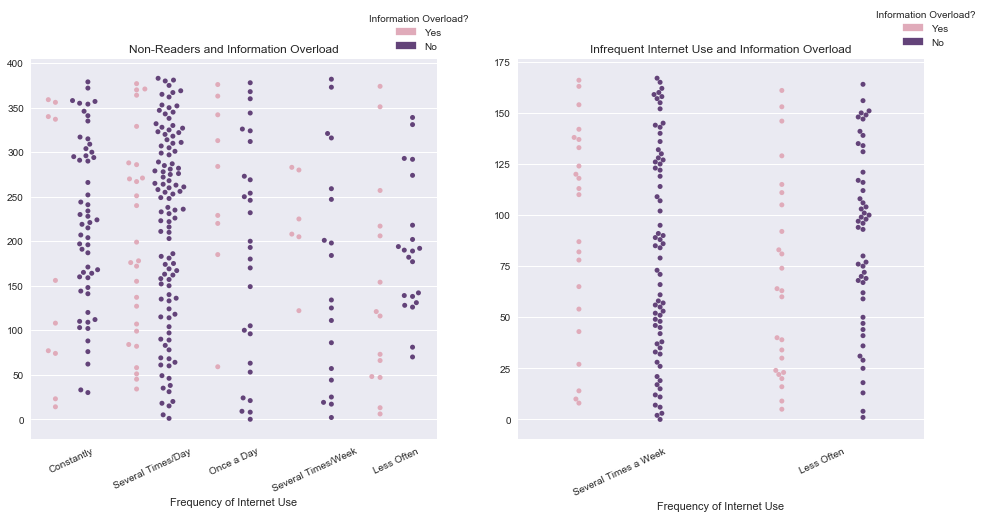

In [19]:
x = no_readers.where((no_readers.q3 == 1) | (no_readers.q3 == 2)
                    & (no_readers.q3 != 8) & (no_readers.q3 != 9)).dropna().reset_index()
y = delta_5.where((delta_5.q3 == 1) | (delta_5.q3 == 2)
                    & (delta_5.q3 != 8) & (delta_5.q3 != 9)).dropna().reset_index()

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 7))

sns.swarmplot(x = 'intfreq', y = x.index, hue = 'q3', data = x, split = True, 
              palette = color_palette_reds_short, ax = ax1).set_xlim(.5, 5.5)
lred_patch = mpatches.Patch(color = '#e0abba', label = 'Yes')
dred_patch = mpatches.Patch(color = '#634379', label = 'No')
ax1.legend(loc='upper right', bbox_to_anchor=(1.10, 1.14), title = ("Information Overload?"),
            handles = [lred_patch, dred_patch])
ax1.set(title = "Non-Readers and Information Overload", xlabel = "Frequency of Internet Use")
ax1.set_xticklabels(['', 'Constantly', 'Several Times/Day', 'Once a Day', 'Several Times/Week', 'Less Often'], rotation = 25)

sns.swarmplot(x = 'intfreq', y = y.index, hue = 'q3', data = y, split = True,
              palette = color_palette_reds_short, ax = ax2)
lred_patch = mpatches.Patch(color = '#e0abba', label = 'Yes')
dred_patch = mpatches.Patch(color = '#634379', label = 'No')
ax2.legend(loc='upper right', bbox_to_anchor=(1.15, 1.15), title = ("Information Overload?"),
            handles = [lred_patch, dred_patch])
ax2.set(title = "Infrequent Internet Use and Information Overload", xlabel = "Frequency of Internet Use")
ax2.set_xticklabels(['Several Times a Week', 'Less Often'], rotation = 25)
    
plt.show()

Below is another T-Test which compares the existence of information overload to those who read in any platform and those who do not read on any platform.  Again, the low P-valuse demonstrates the probability that these samples are indicative of a concrete result.

In [20]:
#Shows where information overload stands for those who read on any platform and those who don't read at all.
x = no_readers.q3
y = any_reader.q3

a = x.where((x == 1) | (x == 2)).dropna()
b = y.where((y == 1) | (y == 2)).dropna()

sam1 = np.random.choice(a, 200, replace = True)
sam2 = np.random.choice(b, 200, replace = True)

stats.ttest_ind(sam1, sam2, equal_var = False)

Ttest_indResult(statistic=-4.4426440483898846, pvalue=1.1764490243503163e-05)

Thus, while the Pew Center's summaries noted the prevalence of respondents who still preferred physical books, to my knowledge, their report did not look at how this corresponded with the feelings of information overload or information preference in regards to this preference for physical books. In addition, they did not consider this choice for print, and its correspondence to lessened information overload, in conjunction with literacy at large. It appears as if digital literacy goes hand in hand with literacy in general and should be considered further by educators and those in the tech industry.
While one might initially suspect that those who choose print books would demonstrate a tendency of overwhelmedness regarding information, the choice for physical books is equally prevalent among both parties.  As digital information grows on an exponential scale and most people demonstrate a preference for more information, print still remains grossly popular. One might conclude that independent booksellers, and the physical book itself, is still quite safe in the 21st century (at least for now).

## Avenues for Further Research and Proposal

Given these findings regarding print media and literacy, there are plenty of interesting avenues for further research.  One might look into *why* people are still reading print materials given that it seems information overload is not one of those reasons, at least in this dataset.  It would also be interesting to look at the factors which promote access to internet and increase digital literacy, in conjuction with those who do not use the internet regularly, yet still read print books. An area of concern for the publishing industry might be how the use of print books changes if customers buy an e-reader. Do they continue to read print books along with their e-books? Do they use the e-reader and go back to print books after awhile or vice-versa? How would they compare the experience of reading a print book to reading on an e-reader? Why did they buy the e-reader? What does this mean for the publishing and information industry at large?
Going forward with my projects, I think it would be interesting to look into these questions, along with an analysis of how the field of Data Science is making inroads into the Arts and Sciences.  The Digital Humanities are starting to gain momentum at Universities within the US, but how does Data Science fit into this new field? How is it being utilized to advance research, literacy and perhaps change the climate of academia - especially given that Humanities departments are currently experiencing a crisis of funding, getting their graduate students hired, finding students to teach, arguing for the necessity of their research in a world focused on STEM subjects and the University system in general as it grapples with student debt.  Big questions for big data.

## Other Sources:

1. _[Thinful Prep-Course Bootcamp Curriculum](https://courses.thinkful.com/data-201-prepv1/course/0)_
2. _[Matplotlib Documentation](https://matplotlib.org/contents.html)_
3. _[Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing)_
4. _[Markdown for Jupyter Notebooks Cheatsheet](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed)_
5. _[Numpy Documentation](https://docs.scipy.org/doc/numpy-1.14.0/index.html)_
6. _[Pew Research Center Data-Set and Articles Mentioned Above](http://www.pewinternet.org/dataset/march-2016-libraries/)_
7. _[Seaborn Documentation](https://seaborn.pydata.org/api.html)_
8. _[VanderPlas, Jake - "Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)_